# Évaluation du modèle de base

Ce notebook évalue le modèle PSMNet, pré-entraîné avec SceneFlow, sur le dataset KITTI 2015. Il servira de comparatif pour notre implémentation mono.

## Importer le modèle PSMNet pré-entrainé

On utilise le modèle officiel mis en ligne par son auteur, auquel nous avons apporté les correctifs nécessaires à son fonctionnement (voir le rapport pour le détail des correctifs).

Le modèle original est disponible à l'adresse : <https://github.com/JiaRenChang/PSMNet.git>

In [1]:
# Téléchargement du modèle PSMNet
!git clone https://github.com/Lyspal/PSMNet.git

Cloning into 'PSMNet'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 327 (delta 15), reused 32 (delta 12), pack-reused 291
Receiving objects: 100% (327/327), 18.67 MiB | 38.54 MiB/s, done.
Resolving deltas: 100% (183/183), done.


In [ ]:
# Importer les correctifs en cours de développement
!cd PSMNet && git pull origin

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/Lyspal/PSMNet
   f056676..90fe3d2  master     -> origin/master
Updating f056676..90fe3d2
Fast-forward
 models/stackhourglass.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [2]:
# # Run the pretrained model  
# %run PSMNet/submission.py --maxdisp 192 \ 
#                           --model stackhourglass \
#                           --KITTI 2015 \
#                           --datapath /content/drive/MyDrive/datasets/KITTI_2015/training/ \
#                           --loadmodel /content/PSMNet/psmnet_pretrained_sceneflow.tar

In [11]:
# Run the pretrained model with Test_img.py instead

left_img = "/content/drive/MyDrive/datasets/KITTI_2015/training/image_2/000002_10.png"
right_img = "/content/drive/MyDrive/datasets/KITTI_2015/training/image_3/000002_10.png"

%run PSMNet/Test_img.py --loadmodel /content/PSMNet/psmnet_pretrained_sceneflow.tar \
                        --leftimg {left_img} \
                        --rightimg {right_img}

load PSMNet
Number of model parameters: 5224768


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


time = 0.93


## Afficher le résultat test

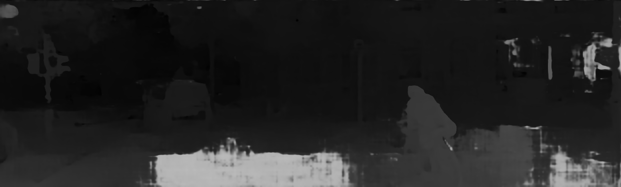

In [12]:
from PIL import Image
from IPython.display import display

def display_img(image):
  width, height = image.size
  result = image.resize((width // 2, height // 2))
  display(result)

res_file = "/content/Test_disparity.png"

result = Image.open(res_file, 'r')
display_img(result)

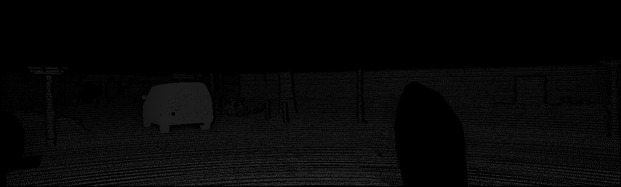

In [13]:
ground_truth = Image.open("/content/drive/MyDrive/datasets/KITTI_2015/training/disp_occ_1/000002_10.png", 'r')
display_img(ground_truth)

In [19]:
# Calculer l'erreur
import numpy as np
import validation as val

result_data = np.array(result)
rows, cols = result_data.shape

ground_truth_data = np.array(ground_truth)

print("Result min disp.:", result_data.min())
print("Result max disp.:", result_data.max())
print("GT min disp.:", ground_truth_data.min())
print("GT max disp.:", ground_truth_data.max(), "\n")

new_shape = (1, rows, cols)
result_data = result_data.reshape(new_shape)
ground_truth_data = ground_truth_data.reshape(new_shape)

result_data_test = result_data - result_data.min()

print("Result test min disp.:", result_data_test.min())
print("Result test max disp.:", result_data_test.max(), "\n")

print("EPE:", val.compute_EPE(result_data_test, ground_truth_data))
print(">3px:", val.compute_TER(result_data_test, ground_truth_data))

Result min disp.: 235
Result max disp.: 47704
GT min disp.: 0
GT max disp.: 18307 

Result test min disp.: 0
Result test max disp.: 47469 

EPE: 8396424.667785807
>3px: 99.9862587224906


In [30]:
# Tester les valeurs des autres disparity maps fournies
disp_noc_1 = Image.open("/content/drive/MyDrive/datasets/KITTI_2015/training/disp_noc_1/000000_10.png", 'r')
disp_noc_1_data = np.array(disp_noc_1)
print(disp_noc_1_data.min())
print(disp_noc_1_data.max())

disp_occ_0 = Image.open("/content/drive/MyDrive/datasets/KITTI_2015/training/disp_occ_0/000000_10.png", 'r')
disp_occ_0_data = np.array(disp_occ_0)
print(disp_occ_0_data.min())
print(disp_occ_0_data.max())

disp_occ_1 = Image.open("/content/drive/MyDrive/datasets/KITTI_2015/training/disp_occ_1/000000_10.png", 'r')
disp_occ_1_data = np.array(disp_noc_1)
print(disp_occ_1_data.min())
print(disp_occ_1_data.max())

0
16619
0
16406
0
16619
